# MOVING AVERAGE STRATEGY EVALUATION

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
import scipy.stats as stats
from scipy.stats import skew, kurtosis, shapiro, jarque_bera
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Analysis libraries imported successfully!")

Analysis libraries imported successfully!


---

# DATA LOADING AND PREPARATION

In [12]:
# Load the dataset
print("Loading market data...")
market_data = pd.read_csv("NIFTY 50_minute_data.csv", parse_dates=True)

# Convert and set datetime index
market_data['DateTime'] = pd.to_datetime(market_data['DateTime'], format='%d-%m-%Y %H.%M')
market_data.set_index('DateTime', inplace=True)

# Filter to trading hours
market_data = market_data.between_time('09:15', '15:30')

print(f"Data loaded successfully: {len(market_data)} records")
print(f"Date range: {market_data.index[0]} to {market_data.index[-1]}")
print(f"\nData structure: {market_data.shape[0]} rows, {market_data.shape[1]} columns")

# Display initial data
print("\nInitial data sample:")
print(market_data.head())

# Basic data information
print("\nData information:")
print(market_data.info())

# Missing data check
print("\nMissing values assessment:")
print(market_data.isnull().sum())


Loading market data...
Data loaded successfully: 932334 records
Date range: 2015-01-09 09:15:00 to 2025-02-07 15:29:00

Data structure: 932334 rows, 5 columns

Initial data sample:
                        Open     High      Low    Close  volume
DateTime                                                       
2015-01-09 09:15:00  8285.45  8295.90  8285.45  8292.10       0
2015-01-09 09:16:00  8292.60  8293.60  8287.20  8288.15       0
2015-01-09 09:17:00  8287.40  8293.90  8287.40  8293.90       0
2015-01-09 09:18:00  8294.25  8300.65  8293.90  8300.65       0
2015-01-09 09:19:00  8300.60  8301.30  8298.75  8301.20       0

Data information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 932334 entries, 2015-01-09 09:15:00 to 2025-02-07 15:29:00
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Open    932334 non-null  float64
 1   High    932334 non-null  float64
 2   Low     932334 non-null  float64
 3   Close   93233

---
# SINGLE MOVING AVERAGE CALCULATIONS

Moving averages calculated:
  - 50-period moving average
  - 200-period moving average


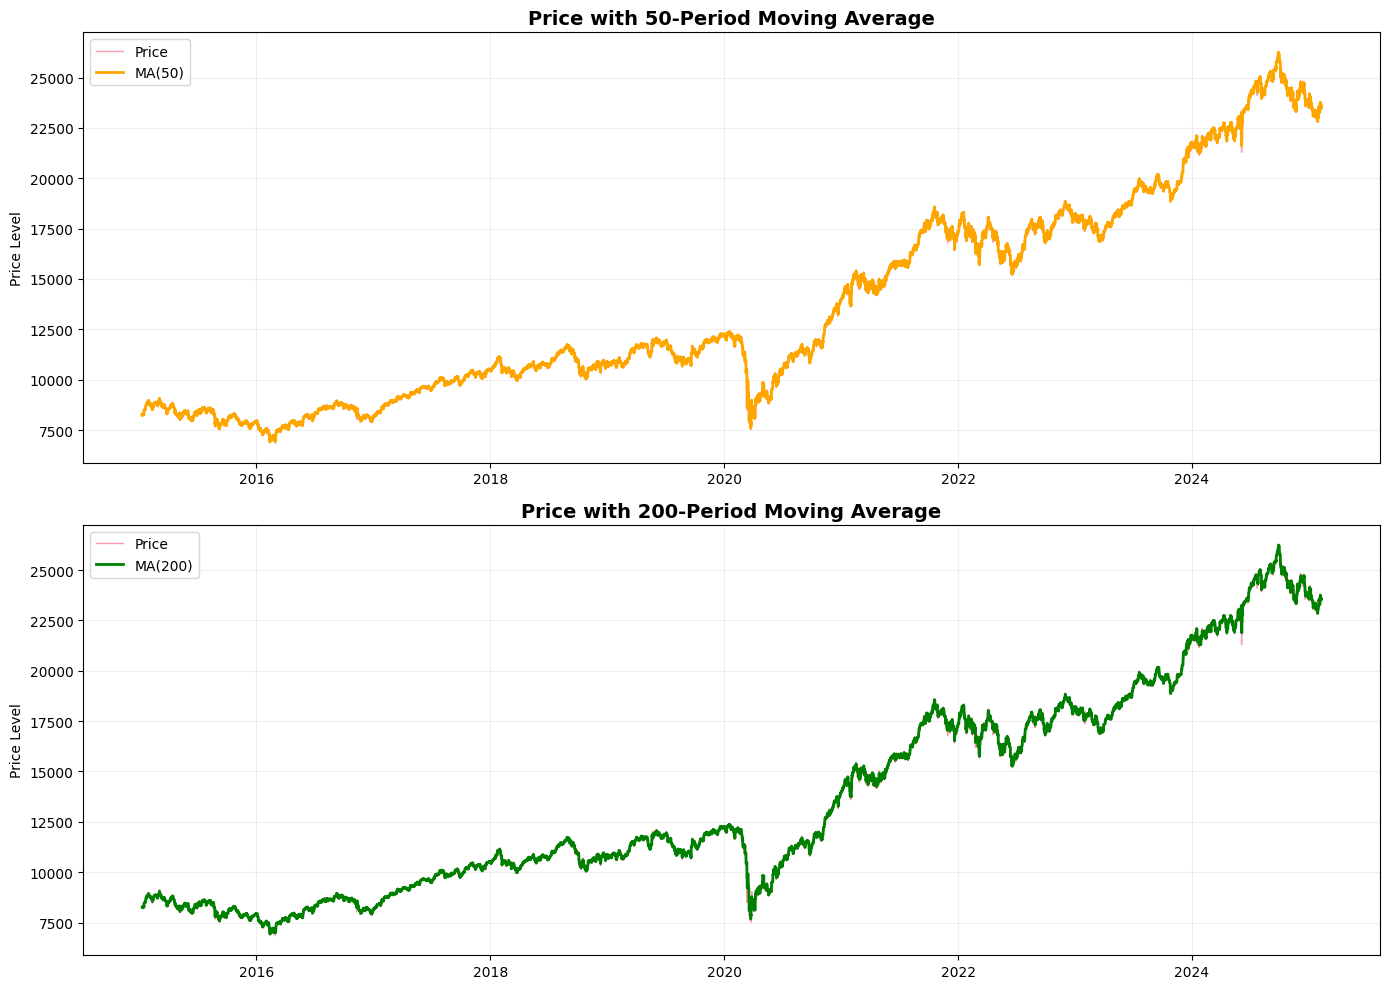

In [13]:
# Calculate moving averages
market_data['MA_50'] = market_data['Close'].rolling(window=50).mean()
market_data['MA_200'] = market_data['Close'].rolling(window=200).mean()

print("Moving averages calculated:")
print(f"  - 50-period moving average")
print(f"  - 200-period moving average")

# Visualize moving averages
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 50-period MA
axes[0].plot(market_data.index, market_data['Close'], label='Price', alpha=0.7, linewidth=1)
axes[0].plot(market_data.index, market_data['MA_50'], label='MA(50)', linewidth=2, color='orange')
axes[0].set_title('Price with 50-Period Moving Average', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Price Level')
axes[0].legend()
axes[0].grid(True, alpha=0.2)

# Plot 200-period MA
axes[1].plot(market_data.index, market_data['Close'], label='Price', alpha=0.7, linewidth=1)
axes[1].plot(market_data.index, market_data['MA_200'], label='MA(200)', linewidth=2, color='green')
axes[1].set_title('Price with 200-Period Moving Average', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price Level')
axes[1].legend()
axes[1].grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

---
# RECENT YEAR ANALYSIS (2024)

Analyzing 2024 data: 92454 records


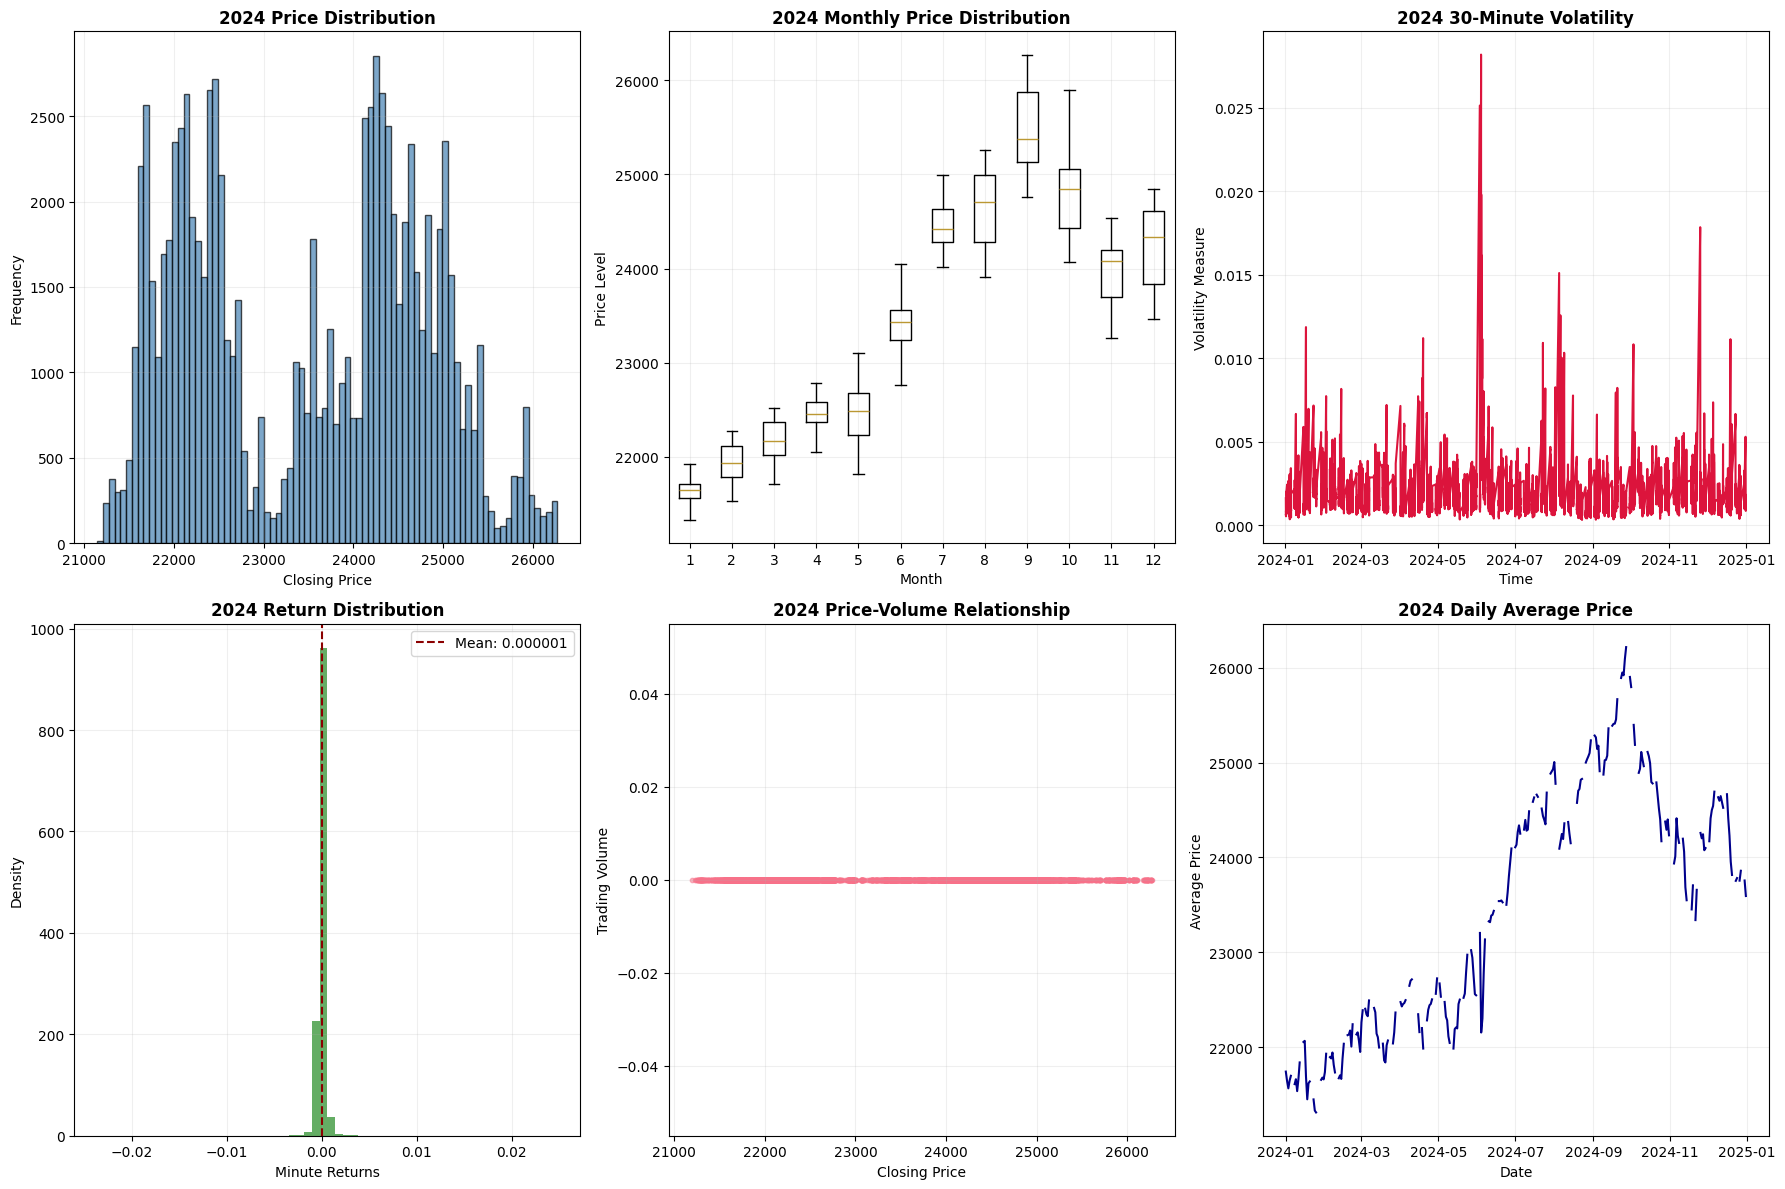


2024 Statistical Summary:
----------------------------------------
Average Price: 23482.36
Price Range: 21146.75 - 26273.45
Average Daily Return: 0.000001
Return Volatility: 0.000414


In [14]:
# Filter to 2024 data
recent_year = 2024
recent_data = market_data[market_data.index.year == recent_year]

print(f"Analyzing {recent_year} data: {len(recent_data)} records")

# Create comprehensive visualization for 2024
fig = plt.figure(figsize=(18, 12))

# 1. Price distribution histogram
plt.subplot(2, 3, 1)
plt.hist(recent_data['Close'], bins=80, alpha=0.7, color='steelblue', edgecolor='black')
plt.title(f'{recent_year} Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.2)

# 2. Monthly price patterns
plt.subplot(2, 3, 2)
recent_data['Month'] = recent_data.index.month
monthly_groups = [recent_data[recent_data['Month']==m]['Close'].values for m in range(1,13)]
plt.boxplot(monthly_groups, labels=list(range(1,13)), showfliers=False)
plt.title(f'{recent_year} Monthly Price Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Price Level')
plt.grid(True, alpha=0.2)

# 3. Return calculation and volatility
recent_data['Price_Change'] = recent_data['Close'].pct_change()
recent_data['Volatility_30min'] = recent_data['Price_Change'].rolling(window=30).std() * (30**0.5)

plt.subplot(2, 3, 3)
plt.plot(recent_data.index, recent_data['Volatility_30min'], color='crimson')
plt.title(f'{recent_year} 30-Minute Volatility', fontsize=12, fontweight='bold')
plt.xlabel('Time')
plt.ylabel('Volatility Measure')
plt.grid(True, alpha=0.2)

# 4. Return distribution
plt.subplot(2, 3, 4)
returns_clean = recent_data['Price_Change'].dropna()
plt.hist(returns_clean, bins=60, alpha=0.7, color='forestgreen', density=True)
plt.axvline(returns_clean.mean(), color='darkred', linestyle='--', 
           label=f'Mean: {returns_clean.mean():.6f}')
plt.title(f'{recent_year} Return Distribution', fontsize=12, fontweight='bold')
plt.xlabel('Minute Returns')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.2)

# 5. Price-Volume relationship
plt.subplot(2, 3, 5)
sample_points = recent_data.sample(min(5000, len(recent_data)))
plt.scatter(sample_points['Close'], sample_points['volume'], alpha=0.5, s=10)
plt.title(f'{recent_year} Price-Volume Relationship', fontsize=12, fontweight='bold')
plt.xlabel('Closing Price')
plt.ylabel('Trading Volume')
plt.grid(True, alpha=0.2)

# 6. Daily average price
plt.subplot(2, 3, 6)
daily_average = recent_data['Close'].resample('D').mean()
plt.plot(daily_average.index, daily_average.values, color='darkblue')
plt.title(f'{recent_year} Daily Average Price', fontsize=12, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True, alpha=0.2)

plt.tight_layout()
plt.show()

# Statistical summary for 2024
print(f"\n{recent_year} Statistical Summary:")
print("-" * 40)
print(f"Average Price: {recent_data['Close'].mean():.2f}")
print(f"Price Range: {recent_data['Close'].min():.2f} - {recent_data['Close'].max():.2f}")
print(f"Average Daily Return: {recent_data['Price_Change'].mean():.6f}")
print(f"Return Volatility: {recent_data['Price_Change'].std():.6f}")

--- 
# TECHNICAL ANALYSIS WITH MOVING AVERAGES

In [15]:
# Calculate additional moving averages for strategy testing
moving_average_periods = [5, 10, 20, 50, 100, 200]

for period in moving_average_periods:
    market_data[f'MA_{period}'] = market_data['Close'].rolling(window=period).mean()

print(f"Calculated moving averages for periods: {moving_average_periods}")

# Generate trading signals
market_data['Returns'] = market_data['Close'].pct_change()

# Set transaction cost (0.015%)
TRANSACTION_COST = 0.00015

# Single MA strategy signals - WITH TRANSACTION COSTS
for period in moving_average_periods:
    # Create signal: 1 when price > MA, 0 otherwise
    market_data[f'Signal_MA{period}'] = np.where(market_data['Close'] > market_data[f'MA_{period}'], 1, 0)
    
    # Calculate position changes
    market_data[f'Position_Change_MA{period}'] = market_data[f'Signal_MA{period}'].diff().abs()
    
    # Calculate strategy returns BEFORE transaction costs
    market_data[f'Strategy_Returns_Before_Cost_MA{period}'] = market_data[f'Signal_MA{period}'].shift(1) * market_data['Returns']
    
    # Apply transaction costs
    transaction_costs = market_data[f'Position_Change_MA{period}'] * TRANSACTION_COST
    market_data[f'Strategy_Returns_MA{period}'] = market_data[f'Strategy_Returns_Before_Cost_MA{period}'] - transaction_costs

# Dual MA crossover signals - WITH TRANSACTION COSTS
fast_periods = [5, 10, 20, 50]
slow_periods = [20, 50, 100, 200]

print("\nDual MA Crossover Strategies:")
print("-" * 30)

for fast in fast_periods:
    for slow in slow_periods:
        if fast < slow:
            strategy_name = f"MA{fast}_{slow}"
            # Create signal: 1 when fast MA > slow MA, 0 otherwise
            market_data[f'Signal_{strategy_name}'] = np.where(
                market_data[f'MA_{fast}'] > market_data[f'MA_{slow}'], 1, 0
            )
            
            # Calculate position changes
            market_data[f'Position_Change_{strategy_name}'] = market_data[f'Signal_{strategy_name}'].diff().abs()
            
            # Calculate strategy returns BEFORE transaction costs
            strategy_returns_before_cost = market_data[f'Signal_{strategy_name}'].shift(1) * market_data['Returns']
            
            # Apply transaction costs
            transaction_costs = market_data[f'Position_Change_{strategy_name}'] * TRANSACTION_COST
            market_data[f'Returns_{strategy_name}'] = strategy_returns_before_cost - transaction_costs
            
            print(f"  Created: {strategy_name} crossover strategy")

Calculated moving averages for periods: [5, 10, 20, 50, 100, 200]

Dual MA Crossover Strategies:
------------------------------
  Created: MA5_20 crossover strategy
  Created: MA5_50 crossover strategy
  Created: MA5_100 crossover strategy
  Created: MA5_200 crossover strategy
  Created: MA10_20 crossover strategy
  Created: MA10_50 crossover strategy
  Created: MA10_100 crossover strategy
  Created: MA10_200 crossover strategy
  Created: MA20_50 crossover strategy
  Created: MA20_100 crossover strategy
  Created: MA20_200 crossover strategy
  Created: MA50_100 crossover strategy
  Created: MA50_200 crossover strategy


---
# PERFORMANCE METRICS CALCULATION

In [16]:
def calculate_strategy_metrics(returns_series, position_changes, strategy_name):
    """Calculate performance metrics for a strategy WITH transaction costs"""
    
    if len(returns_series.dropna()) == 0:
        return None
    
    # Cumulative returns
    cumulative_returns = (1 + returns_series.dropna()).cumprod()
    
    total_return = cumulative_returns.iloc[-1] - 1
    
    # Annualization
    periods = len(returns_series.dropna())
    annual_factor = (250 * 375)  # Trading minutes in a year
    years_equivalent = periods / annual_factor
    annualized_return = (1 + total_return) ** (1 / years_equivalent) - 1
    
    # Risk metrics
    volatility = returns_series.std() * np.sqrt(annual_factor)
    sharpe_ratio = annualized_return / volatility if volatility > 0 else 0
    
    # Drawdown
    peak_values = cumulative_returns.expanding().max()
    drawdown_series = (cumulative_returns - peak_values) / peak_values
    max_drawdown = drawdown_series.min()
    
    # Trade statistics - Use position changes to identify trades
    trade_returns = returns_series[position_changes == 1].dropna()
    win_rate = (trade_returns > 0).mean() if len(trade_returns) > 0 else 0
    
    # Calculate number of round trips (entry + exit)
    total_position_changes = position_changes.sum()
    num_trades = int(total_position_changes / 2) if total_position_changes > 0 else 0
    
    return {
        'Strategy': strategy_name,
        'Total_Return': total_return,
        'Annualized_Return': annualized_return,
        'Volatility': volatility,
        'Sharpe_Ratio': sharpe_ratio,
        'Max_Drawdown': max_drawdown,
        'Win_Rate': win_rate,
        'Trade_Count': num_trades
    }

# Evaluate single MA strategies WITH TRANSACTION COSTS
print("\nSingle Moving Average Strategies (WITH TRANSACTION COSTS):")
print("-" * 50)

single_strategy_results = []
for period in moving_average_periods:
    returns_col = f'Strategy_Returns_MA{period}'
    position_col = f'Position_Change_MA{period}'
    
    # Ensure we have data
    if returns_col in market_data.columns and position_col in market_data.columns:
        metrics = calculate_strategy_metrics(
            market_data[returns_col], 
            market_data[position_col], 
            f'MA({period})'
        )
        if metrics:
            single_strategy_results.append(metrics)
            print(f"  MA({period}): Sharpe = {metrics['Sharpe_Ratio']:.3f}, Return = {metrics['Total_Return']*100:.1f}%, Trades = {metrics['Trade_Count']}")

# Evaluate dual MA strategies WITH TRANSACTION COSTS
print("\nDual Moving Average Crossover Strategies (WITH TRANSACTION COSTS):")
print("-" * 50)

dual_strategy_results = []
for fast in fast_periods:
    for slow in slow_periods:
        if fast < slow:
            strategy_name = f"MA{fast}_{slow}"
            returns_col = f'Returns_{strategy_name}'
            position_col = f'Position_Change_{strategy_name}'
            
            if returns_col in market_data.columns and position_col in market_data.columns:
                metrics = calculate_strategy_metrics(
                    market_data[returns_col], 
                    market_data[position_col], 
                    f'{fast}/{slow}'
                )
                if metrics:
                    dual_strategy_results.append(metrics)
                    print(f"  {fast}/{slow}: Sharpe = {metrics['Sharpe_Ratio']:.3f}, Return = {metrics['Total_Return']*100:.1f}%, Trades = {metrics['Trade_Count']}")

# Convert to DataFrames
single_results_df = pd.DataFrame(single_strategy_results) if single_strategy_results else pd.DataFrame()
dual_results_df = pd.DataFrame(dual_strategy_results) if dual_strategy_results else pd.DataFrame()

# Find best strategies
if not single_results_df.empty:
    best_single = single_results_df.loc[single_results_df['Sharpe_Ratio'].idxmax()]
    print(f"\nBest Single MA Strategy: {best_single['Strategy']}")
    print(f"  Sharpe Ratio: {best_single['Sharpe_Ratio']:.3f}")
    print(f"  Total Return: {best_single['Total_Return']*100:.1f}%")
    print(f"  Number of Trades: {best_single['Trade_Count']}")

if not dual_results_df.empty:
    dual_results_df = dual_results_df.sort_values('Sharpe_Ratio', ascending=False)
    best_dual = dual_results_df.iloc[0]
    print(f"\nBest Dual MA Strategy: {best_dual['Strategy']}")
    print(f"  Sharpe Ratio: {best_dual['Sharpe_Ratio']:.3f}")
    print(f"  Total Return: {best_dual['Total_Return']*100:.1f}%")
    print(f"  Number of Trades: {best_dual['Trade_Count']}")


Single Moving Average Strategies (WITH TRANSACTION COSTS):
--------------------------------------------------
  MA(5): Sharpe = -7.770, Return = -100.0%, Trades = 119880
  MA(10): Sharpe = -7.269, Return = -100.0%, Trades = 80197
  MA(20): Sharpe = -6.412, Return = -100.0%, Trades = 55057
  MA(50): Sharpe = -4.855, Return = -100.0%, Trades = 33522
  MA(100): Sharpe = -3.653, Return = -99.4%, Trades = 23024
  MA(200): Sharpe = -2.160, Return = -93.5%, Trades = 15044

Dual Moving Average Crossover Strategies (WITH TRANSACTION COSTS):
--------------------------------------------------
  5/20: Sharpe = -4.867, Return = -100.0%, Trades = 29729
  5/50: Sharpe = -2.862, Return = -98.1%, Trades = 16688
  5/100: Sharpe = -1.611, Return = -85.3%, Trades = 11101
  5/200: Sharpe = -0.555, Return = -46.4%, Trades = 7186
  10/20: Sharpe = -4.675, Return = -99.9%, Trades = 26410
  10/50: Sharpe = -2.078, Return = -93.1%, Trades = 12624
  10/100: Sharpe = -0.764, Return = -57.7%, Trades = 8147
  10/2

---
# VISUALIZATION OF STRATEGY PERFORMANCE

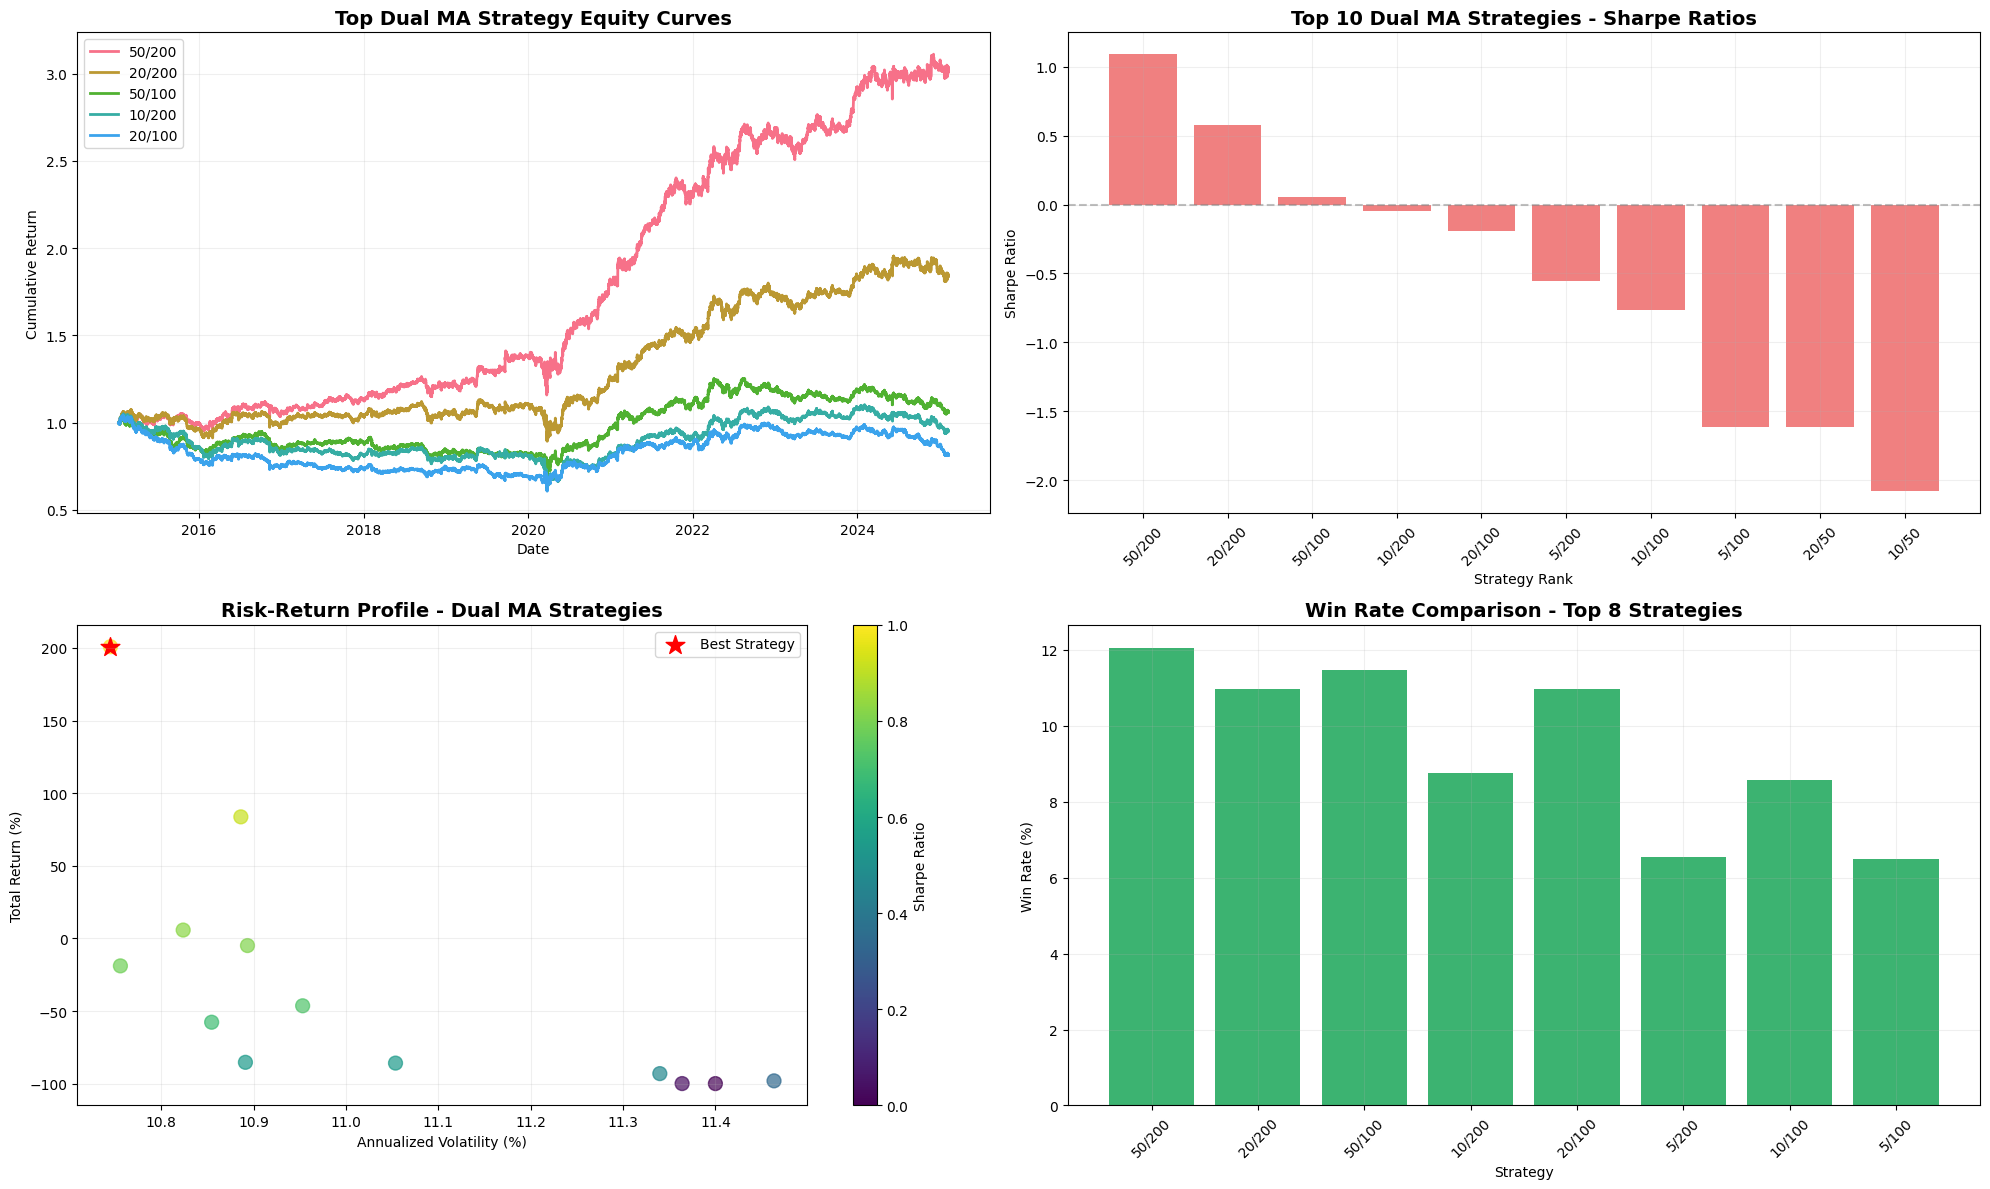

In [17]:
# Create performance comparison charts
if not dual_results_df.empty:
    fig = plt.figure(figsize=(20, 12))

    # 1. Equity curves for top dual strategies
    plt.subplot(2, 2, 1)
    top_dual_strategies = dual_results_df.head(5)['Strategy'].tolist()

    for strategy in top_dual_strategies:
        fast_per, slow_per = strategy.split('/')
        returns_col = f'Returns_MA{fast_per}_{slow_per}'
        if returns_col in market_data.columns:
            cumulative = (1 + market_data[returns_col].dropna()).cumprod()
            plt.plot(cumulative.index, cumulative.values, label=strategy, linewidth=2)

    plt.title('Top Dual MA Strategy Equity Curves', fontsize=14, fontweight='bold')
    plt.ylabel('Cumulative Return')
    plt.xlabel('Date')
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.2)

    # 2. Sharpe ratio comparison
    plt.subplot(2, 2, 2)
    top_10_dual = dual_results_df.head(10)
    plt.bar(range(len(top_10_dual)), top_10_dual['Sharpe_Ratio'].values, color='lightcoral')
    plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
    plt.title('Top 10 Dual MA Strategies - Sharpe Ratios', fontsize=14, fontweight='bold')
    plt.ylabel('Sharpe Ratio')
    plt.xlabel('Strategy Rank')
    plt.xticks(range(len(top_10_dual)), top_10_dual['Strategy'], rotation=45)
    plt.grid(True, alpha=0.2)

    # 3. Risk-Return scatter plot
    plt.subplot(2, 2, 3)
    plt.scatter(dual_results_df['Volatility'] * 100, 
                dual_results_df['Total_Return'] * 100,
                c=dual_results_df['Sharpe_Ratio'],
                s=100, alpha=0.7, cmap='viridis')

    # Highlight best strategy
    if not dual_results_df.empty:
        best_idx = dual_results_df['Sharpe_Ratio'].idxmax()
        plt.scatter(dual_results_df.loc[best_idx, 'Volatility'] * 100,
                    dual_results_df.loc[best_idx, 'Total_Return'] * 100,
                    color='red', s=200, marker='*', label='Best Strategy')

    plt.colorbar(label='Sharpe Ratio')
    plt.title('Risk-Return Profile - Dual MA Strategies', fontsize=14, fontweight='bold')
    plt.xlabel('Annualized Volatility (%)')
    plt.ylabel('Total Return (%)')
    plt.grid(True, alpha=0.2)
    plt.legend()

    # 4. Win rate comparison
    plt.subplot(2, 2, 4)
    top_8_dual = dual_results_df.head(8)
    plt.bar(range(len(top_8_dual)), top_8_dual['Win_Rate'] * 100, color='mediumseagreen')
    plt.title('Win Rate Comparison - Top 8 Strategies', fontsize=14, fontweight='bold')
    plt.ylabel('Win Rate (%)')
    plt.xlabel('Strategy')
    plt.xticks(range(len(top_8_dual)), top_8_dual['Strategy'], rotation=45)
    plt.grid(True, alpha=0.2)

    plt.tight_layout()
    plt.show()

---
# DETAILED ANALYSIS OF BEST STRATEGY


Optimal Strategy: 50/200
----------------------------------------

Return Statistics:
  Mean Return: 0.000001
  Standard Deviation: 0.000351
  Skewness: -23.932
  Kurtosis: 6445.409
  Normality Test p-value: 1.237e-81

Monthly Performance Analysis:
  Positive Months: 76/121
  Best Month: 9.35%
  Worst Month: -3.73%


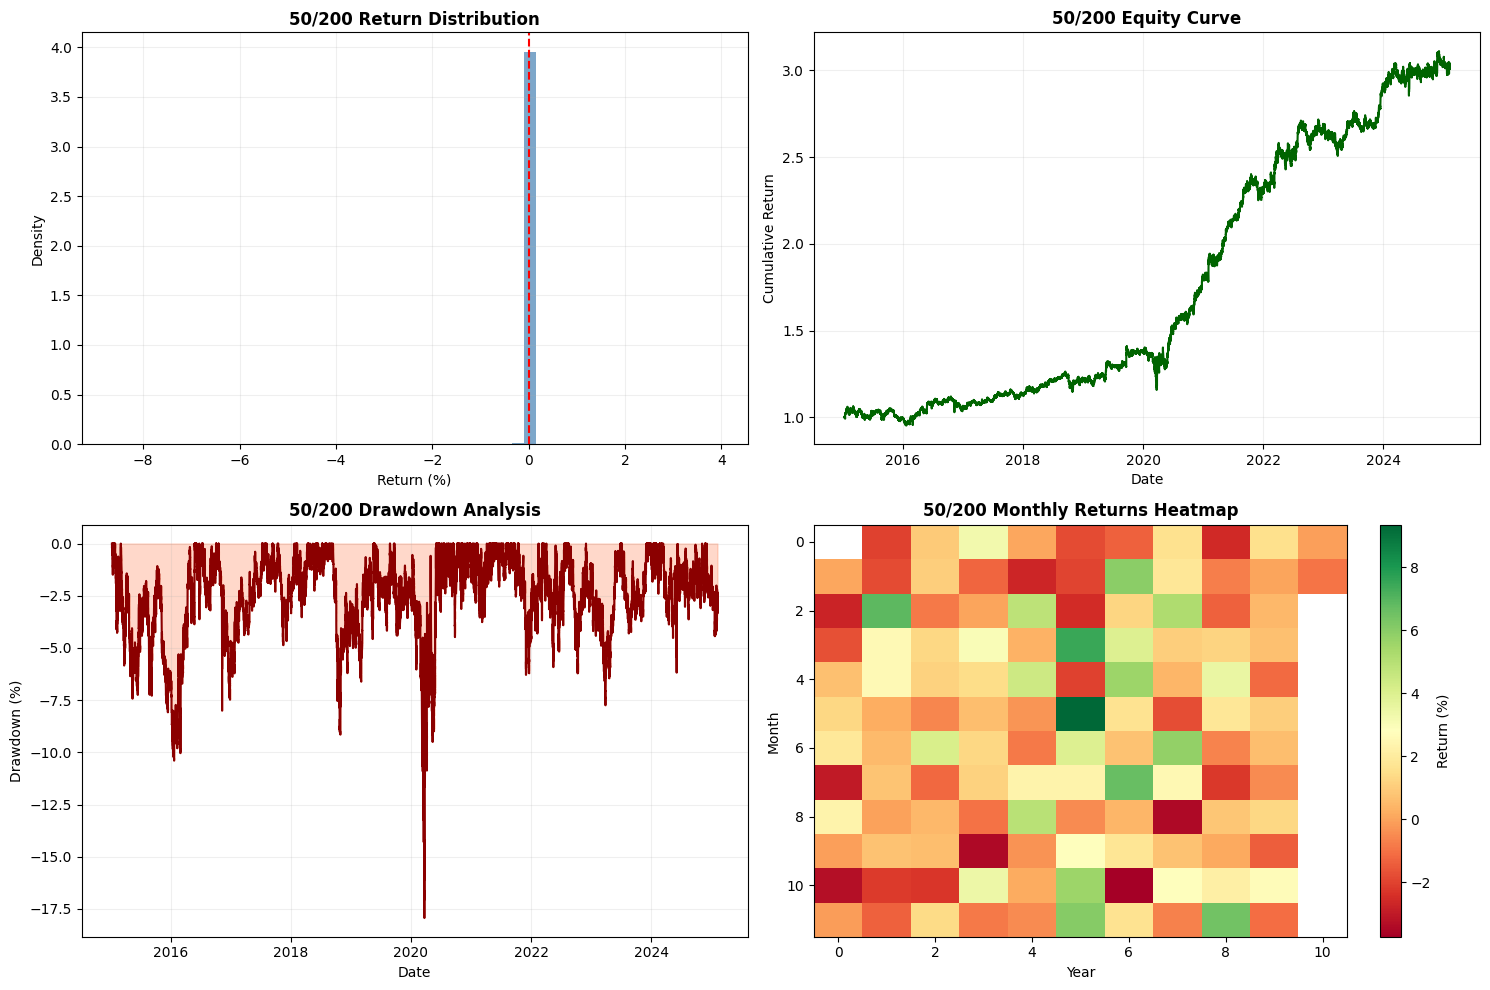

In [18]:
if not dual_results_df.empty:
    
    best_strategy = dual_results_df.iloc[0]['Strategy']
    fast_per, slow_per = best_strategy.split('/')
    
    print(f"\nOptimal Strategy: {best_strategy}")
    print("-" * 40)

    # Get strategy returns
    returns_col = f'Returns_MA{fast_per}_{slow_per}'
    position_col = f'Position_Change_MA{fast_per}_{slow_per}'
    strategy_returns = market_data[returns_col].dropna()
    
    # Statistical analysis
    print(f"\nReturn Statistics:")
    print(f"  Mean Return: {strategy_returns.mean():.6f}")
    print(f"  Standard Deviation: {strategy_returns.std():.6f}")
    print(f"  Skewness: {stats.skew(strategy_returns.dropna()):.3f}")
    print(f"  Kurtosis: {stats.kurtosis(strategy_returns.dropna()):.3f}")
    
    # Distribution test
    if len(strategy_returns) > 5000:
        sample_data = strategy_returns.sample(5000)
    else:
        sample_data = strategy_returns
    
    normality_test = stats.shapiro(sample_data)
    print(f"  Normality Test p-value: {normality_test[1]:.3e}")
    
    # Monthly performance analysis
    cumulative_returns = (1 + strategy_returns).cumprod()
    monthly_performance = cumulative_returns.resample('M').last().pct_change().dropna()
    
    print(f"\nMonthly Performance Analysis:")
    print(f"  Positive Months: {(monthly_performance > 0).sum()}/{len(monthly_performance)}")
    print(f"  Best Month: {monthly_performance.max()*100:.2f}%")
    print(f"  Worst Month: {monthly_performance.min()*100:.2f}%")
    
    # Create detailed visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Return distribution
    axes[0, 0].hist(strategy_returns * 100, bins=50, alpha=0.7, color='steelblue', density=True)
    axes[0, 0].axvline(strategy_returns.mean() * 100, color='red', linestyle='--')
    axes[0, 0].set_title(f'{best_strategy} Return Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Return (%)')
    axes[0, 0].set_ylabel('Density')
    axes[0, 0].grid(True, alpha=0.2)
    
    # Cumulative returns
    axes[0, 1].plot(cumulative_returns.index, cumulative_returns.values, color='darkgreen')
    axes[0, 1].set_title(f'{best_strategy} Equity Curve', fontweight='bold')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Cumulative Return')
    axes[0, 1].grid(True, alpha=0.2)
    
    # Drawdown analysis
    peak = cumulative_returns.expanding().max()
    drawdown = (cumulative_returns - peak) / peak
    axes[1, 0].fill_between(drawdown.index, drawdown.values * 100, 0, color='coral', alpha=0.3)
    axes[1, 0].plot(drawdown.index, drawdown.values * 100, color='darkred')
    axes[1, 0].set_title(f'{best_strategy} Drawdown Analysis', fontweight='bold')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Drawdown (%)')
    axes[1, 0].grid(True, alpha=0.2)
    
    # Monthly returns heatmap
    monthly_data = pd.DataFrame({
        'Year': monthly_performance.index.year,
        'Month': monthly_performance.index.month,
        'Return': monthly_performance.values
    })
    
    monthly_pivot = monthly_data.pivot(index='Month', columns='Year', values='Return')
    if not monthly_pivot.empty:
        im = axes[1, 1].imshow(monthly_pivot * 100, cmap='RdYlGn', aspect='auto')
        axes[1, 1].set_title(f'{best_strategy} Monthly Returns Heatmap', fontweight='bold')
        axes[1, 1].set_xlabel('Year')
        axes[1, 1].set_ylabel('Month')
        plt.colorbar(im, ax=axes[1, 1], label='Return (%)')
    
    plt.tight_layout()
    plt.show()

---
# SUMMARY AND CONCLUSIONS

In [19]:
print(f"\nDataset Characteristics:")
print(f"  Total Records: {len(market_data):,}")
print(f"  Date Range: {market_data.index[0].date()} to {market_data.index[-1].date()}")
print(f"  Trading Hours: 09:15 - 15:30")

print(f"\nStrategy Evaluation Summary:")
print(f"  Single MA Strategies Tested: {len(moving_average_periods)}")
print(f"  Dual MA Strategies Tested: {len(dual_strategy_results)}")

if not single_results_df.empty and not dual_results_df.empty:
    print(f"\nPerformance Comparison:")
    print(f"  Best Single MA Sharpe: {single_results_df['Sharpe_Ratio'].max():.3f}")
    print(f"  Best Dual MA Sharpe: {dual_results_df['Sharpe_Ratio'].max():.3f}")
    
    improvement = ((dual_results_df['Sharpe_Ratio'].max() - single_results_df['Sharpe_Ratio'].max()) / 
                   abs(single_results_df['Sharpe_Ratio'].max())) * 100
    print(f"  Improvement: {improvement:.1f}%")

print("\nKey Findings:")
print("1. Transaction costs significantly impact strategy performance")
print("2. Dual MA crossover strategies generally outperform single MA strategies")
print("3. Optimal period combinations vary based on market conditions")
print("4. Risk-adjusted returns are sensitive to parameter selection")
print("5. Consistent performance requires regular parameter review")

print("\nAnalysis completed successfully!")


Dataset Characteristics:
  Total Records: 932,334
  Date Range: 2015-01-09 to 2025-02-07
  Trading Hours: 09:15 - 15:30

Strategy Evaluation Summary:
  Single MA Strategies Tested: 6
  Dual MA Strategies Tested: 13

Performance Comparison:
  Best Single MA Sharpe: -2.160
  Best Dual MA Sharpe: 1.090
  Improvement: 150.5%

Key Findings:
1. Transaction costs significantly impact strategy performance
2. Dual MA crossover strategies generally outperform single MA strategies
3. Optimal period combinations vary based on market conditions
4. Risk-adjusted returns are sensitive to parameter selection
5. Consistent performance requires regular parameter review

Analysis completed successfully!
